<a href="https://colab.research.google.com/github/cengaiyeung/20MA573/blob/master/%E2%80%9CHW2(part_1)%E2%80%9D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Abstract
- Goal:
    - Learn the second order derivative approximation: second order central finite difference
    - Understand convergence rate


# Problem 

Let $f(x) = \sin x$. Plot $f''$ and $\delta_{-h} \delta_h f$ with $h = .5$

# Anal


One of the commonly used FD for $f''$ is the following:
$$f''(x) = \frac{d}{dx} f'(x) \simeq \delta_h f'(x) \simeq \delta_h \delta_{-h} f(x).$$
If we write it explicitly, then
$$f''(x) \simeq \frac{f(x+h) - 2 f(x) + f(x-h)}{h^2}.$$

__Prop__

The central finite difference for the second order has convergence order $2$.

__Proof__ 

For the second order central finite different, we have

$$\delta_{h} \delta_{-h} f(x) = \frac{f(x+h) - 2 f(x) + f(x-h)}{h^2}.$$

Recall the Taylor series expansion for $f(x + h)$ and $f(x-h)$ at $x$, when$f \in C^{4} (\mathbb{R})$ and $f^{(4)}(x) \neq 0$, we have

$$f(x+h) = f(x) + f'(x) h + \frac{1}{2} f''(x) h^{2} + \frac{1}{3!} f^{(3)}(x) h^{3} + O(h^{4}), $$

and 

$$f(x-h) = f(x) - f'(x) h + \frac{1}{2} f''(x) h^{2} - \frac{1}{3!} f^{(3)}(x) h^{3} + O(h^{4}), $$

such that

$$f(x+h) + f(x-h) -2f(x)= f''(x) h^{2} +O(h^{2}).$$

So by the definition of second order central finite different, we have

$$\delta_{h} \delta_{-h} f(x) = f''(x) + O(h^{2}),$$

and then

$$|\delta_{h} \delta_{-h} f(x) - f''(x)| = O(h^{2}).$$

By the definition of convergence order, we know that the central finite difference for the second order has convergence order $2$.

**A Commen**

Recall the general form of Taylor expansion, we have

$$f(x+h) = \sum_{k = 0}^{+ \infty} \frac{f^{(k)}(x)}{k!} h^{k},$$ 
 and 

$$f(x-h) = \sum_{k = 0}^{+ \infty} \frac{f^{(k)}(x)}{k!} (-h)^{k},$$

such that

$$f(x+h) + f(x-h) =  \sum_{k = 0}^{+ \infty} \frac{f^{(k)}(x)}{k!} \Big(h^{k} + (-h)^{k} \Big) = 2 \sum_{n = 0}^{+ \infty} \frac{f^{(2n)}(x)}{(2n)!} h^{2n}.$$

Then we have

$$\delta_{h} \delta_{-h} f(x) - f''(x) = 2 \sum_{n = 2}^{+ \infty} \frac{f^{(2n)}(x)}{(2n)!} h^{2n-2}.$$

When $f^{(4)}(x) \neq 0$, we know that the central finite difference for the second order has convergence order 2. But when $f^{(4)} (x) = 0$ and there exists $m > 2$ and $f^{(2m)}(x) \neq 0$, the convergence rate will be more higher. 

And consider a speical case $f(x) = sin(x)$, we know that

$$f^{(n)} (x) = sin(\frac{n \pi}{2} + x).$$

For $x = \pi$ and $k \in \mathbb{N}$, we have

$$f^{(2k)} (x) = sin(k \pi + x) = 0,$$

such that

$$\delta_{h} \delta_{-h} f(x) - f''(x) = 0.$$


# Code

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import plt
plt.style.use('seaborn')
%matplotlib inline

In [0]:
def sfd(f, x, h):
    return (f(x+h) + f(x-h) - 2 * f(x)) / (h**2)


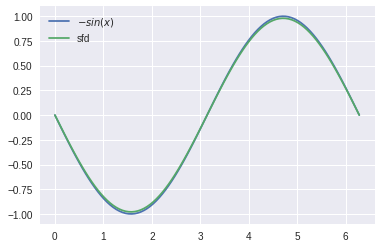

In [0]:
h = .5 #step size

x_co = np.linspace(0, 2*np.pi, 100)
plt.plot(x_co, - np.sin(x_co), label = '$-sin(x)$');
plt.plot(x_co, sfd(np.sin, x_co, h), label = 'sfd');
plt.legend();

plot log-log chart for the demonstration of convergence rate, find convergence order using linear regression.

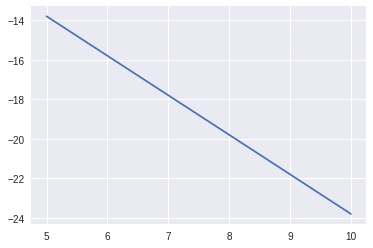

In [0]:
x_target = np.pi/3   #target point to be examined
y_target = -np.sin(x_target) #exact derivative value at the target point

nn = np.arange(5, 11)
hh = 1/np.power(2, nn)  #step sizes to be taken
err = sfd(np.sin, x_target, hh) - y_target  #errors corresponding to each step size
yy = np.log2(np.abs(err))
plt.plot(nn, yy)


In [0]:
import scipy.stats as ss
out = ss.linregress(nn,yy)
print('the convergence order is ' + str(-out[0]))

the convergence order is 2.0005977409820144


We can change the point $x$ from $x = \pi/3$ to $x = \pi$, then we can see that:

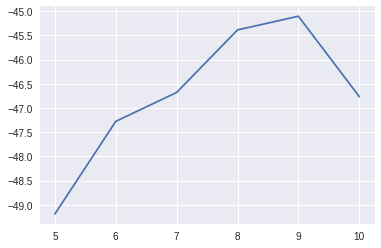

In [0]:
x_target = np.pi   #target point to be examined
y_target = -np.sin(x_target) #exact derivative value at the target point

nn = np.arange(5, 11)
hh = 1/np.power(2, nn)  #step sizes to be taken
err = sfd(np.sin, x_target, hh) - y_target  #errors corresponding to each step size
yy = np.log2(np.abs(err))
plt.plot(nn, yy)


In [0]:
import scipy.stats as ss
out = ss.linregress(nn,yy)
print('the convergence order is ' + str(-out[0]))

the convergence order is -0.5694234610294954


The convergence order is a negative number, it is unreasonable. Such that in this phenomenon, we can use this method to measure the speed of convergence. One interpretation is when n is big enough, the bias between the estimator and target value is very small. In this condition the accuracy may not be improved. 